<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/ann_classification_hotel_real_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
hotel = pd.read_csv("/content/hotel_bookings_updated_2024.csv")

In [ ]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel - Pune,0,23,2024,September,39,29,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2024-09-29 05:33:06.002060492,Pune
119386,City Hotel - Mumbai,0,102,2024,November,46,16,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2024-11-16 01:55:18.426320680,Mumbai
119387,City Hotel - Lucknow,0,34,2024,April,16,19,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2024-04-19 07:50:22.982016768,Lucknow
119388,City Hotel - Ahmedabad,0,109,2024,October,40,5,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2024-10-05 12:37:40.429352788,Ahmedabad


In [ ]:

hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel - Pune,0,23,2024,September,39,29,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2024-09-29 05:33:06.002060492,Pune
119386,City Hotel - Mumbai,0,102,2024,November,46,16,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2024-11-16 01:55:18.426320680,Mumbai
119387,City Hotel - Lucknow,0,34,2024,April,16,19,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2024-04-19 07:50:22.982016768,Lucknow
119388,City Hotel - Ahmedabad,0,109,2024,October,40,5,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2024-10-05 12:37:40.429352788,Ahmedabad


In [ ]:
hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


In [ ]:
hotel['reservation_status_date'].value_counts()

,count
reservation_status_date,
2024-01-13 19:56:56.304684686,8
2024-01-20 23:29:47.169672247,8
2024-02-20 02:48:47.968238279,7
2024-05-14 14:11:56.749449278,7
2024-08-29 09:12:43.577884060,7
...,...
2024-09-15 19:22:05.579408488,1
2024-02-22 21:43:48.151672264,1
2024-01-18 04:43:35.276114214,1


In [ ]:
hotel['children'] = hotel['children'].fillna(0)

In [ ]:
hotel['country'] = hotel['country'].fillna('unknown')

In [ ]:
hotel['agent'] = hotel['agent'].fillna(0)

In [ ]:
hotel['company'] = hotel['company'].fillna(0)

In [ ]:
hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
hotel.duplicated().sum()

np.int64(0)

In [ ]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel - Pune,0,23,2024,September,39,29,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2024-09-29 05:33:06.002060492,Pune
119386,City Hotel - Mumbai,0,102,2024,November,46,16,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2024-11-16 01:55:18.426320680,Mumbai
119387,City Hotel - Lucknow,0,34,2024,April,16,19,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2024-04-19 07:50:22.982016768,Lucknow
119388,City Hotel - Ahmedabad,0,109,2024,October,40,5,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2024-10-05 12:37:40.429352788,Ahmedabad


In [ ]:
X = hotel.drop('is_canceled', axis=1)
y = hotel['is_canceled']

In [ ]:
X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,342,2024,July,30,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,737,2024,April,17,28,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,7,2024,September,37,10,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,13,2024,August,33,14,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,14,2024,September,37,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel - Pune,23,2024,September,39,29,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2024-09-29 05:33:06.002060492,Pune
119386,City Hotel - Mumbai,102,2024,November,46,16,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2024-11-16 01:55:18.426320680,Mumbai
119387,City Hotel - Lucknow,34,2024,April,16,19,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2024-04-19 07:50:22.982016768,Lucknow
119388,City Hotel - Ahmedabad,109,2024,October,40,5,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2024-10-05 12:37:40.429352788,Ahmedabad


In [ ]:
X.select_dtypes(include='object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'city'],
      dtype='object')

In [ ]:
X.select_dtypes(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,April,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,September,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,August,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,September,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-09-14 14:27:32.473846000,Lucknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel - Pune,September,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-09-29 05:33:06.002060492,Pune
119386,City Hotel - Mumbai,November,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2024-11-16 01:55:18.426320680,Mumbai
119387,City Hotel - Lucknow,April,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2024-04-19 07:50:22.982016768,Lucknow
119388,City Hotel - Ahmedabad,October,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-10-05 12:37:40.429352788,Ahmedabad


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_x = {}

In [ ]:
for i in X.select_dtypes(include='object').columns:
  le = LabelEncoder()
  X[i] = le.fit_transform(X[i])
  le_x[i] = le

In [ ]:
X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,18,342,2024,5,30,27,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0.0,0,2,0.00,0,0,1,43426,3
1,28,737,2024,0,17,28,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0.0,0,2,0.00,0,0,1,24703,13
2,20,7,2024,11,37,10,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0.0,0,2,75.00,0,0,1,52529,5
3,26,13,2024,1,33,14,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0.0,0,2,75.00,0,0,1,47115,11
4,27,14,2024,11,37,14,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0.0,0,2,98.00,0,1,1,53433,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,14,23,2024,11,39,29,2,5,2,0.0,0,0,15,5,3,0,0,0,0,0,0,0,394.0,0.0,0,2,96.14,0,0,1,56458,14
119386,13,102,2024,9,46,16,2,5,3,0.0,0,0,56,6,3,0,0,0,4,4,0,0,9.0,0.0,0,2,225.43,0,2,1,66453,13
119387,12,34,2024,0,16,19,2,5,2,0.0,0,0,43,6,3,0,0,0,3,3,0,0,9.0,0.0,0,2,157.71,0,4,1,22740,12
119388,0,109,2024,10,40,5,2,5,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,89.0,0.0,0,2,104.40,0,0,1,57754,0


In [ ]:
X.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
le_x

{'hotel': LabelEncoder(),
 'arrival_date_month': LabelEncoder(),
 'meal': LabelEncoder(),
 'country': LabelEncoder(),
 'market_segment': LabelEncoder(),
 'distribution_channel': LabelEncoder(),
 'reserved_room_type': LabelEncoder(),
 'assigned_room_type': LabelEncoder(),
 'deposit_type': LabelEncoder(),
 'customer_type': LabelEncoder(),
 'reservation_status': LabelEncoder(),
 'reservation_status_date': LabelEncoder(),
 'city': LabelEncoder()}

In [ ]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [ ]:
le_x

{'hotel': LabelEncoder(),
 'arrival_date_month': LabelEncoder(),
 'meal': LabelEncoder(),
 'country': LabelEncoder(),
 'market_segment': LabelEncoder(),
 'distribution_channel': LabelEncoder(),
 'reserved_room_type': LabelEncoder(),
 'assigned_room_type': LabelEncoder(),
 'deposit_type': LabelEncoder(),
 'customer_type': LabelEncoder(),
 'reservation_status': LabelEncoder(),
 'reservation_status_date': LabelEncoder(),
 'city': LabelEncoder()}

In [ ]:
le_y

LabelEncoder()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[X.columns] = sc.fit_transform(X[X.columns])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((95512, 32), (23878, 32), (95512,), (23878,))

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(32,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9506 - loss: 0.1539 - val_accuracy: 0.9991 - val_loss: 0.0072
Epoch 2/5
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9995 - loss: 0.0058 - val_accuracy: 0.9999 - val_loss: 0.0027
Epoch 3/5
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 4/5
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 1.0000 - loss: 9.5267e-04 - val_accuracy: 0.9999 - val_loss: 7.5344e-04
Epoch 5/5
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 4.2497e-04 - val_accuracy: 0.9999 - val_loss: 4.8916e-04


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 4.0645e-04
Test Loss: 0.0005
Test Accuracy: 0.9999


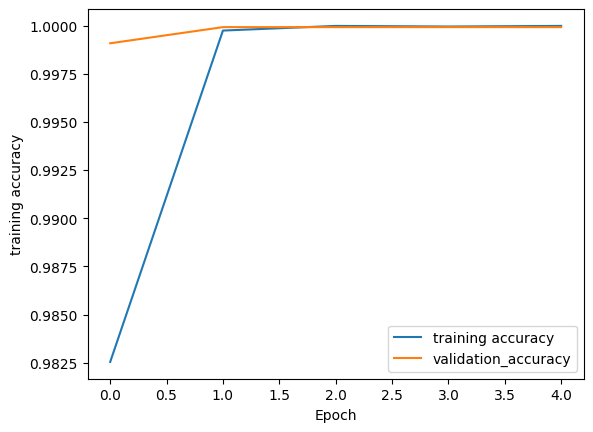

In [ ]:
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("training accuracy")
plt.legend()
plt.show()

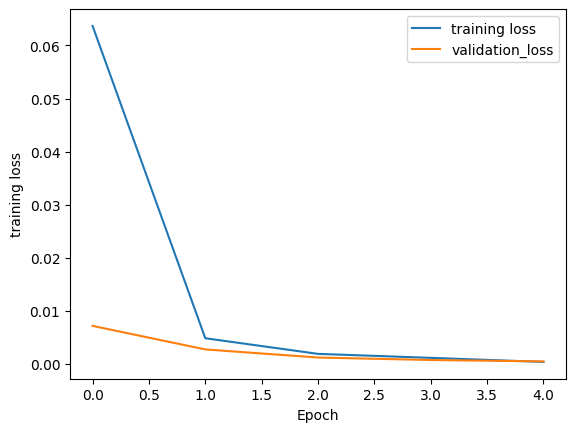

In [ ]:
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.xlabel("Epoch")
plt.ylabel("training loss")
plt.legend()
plt.show()

In [ ]:
def model_prediction(hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,
                    arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,
                    previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,
                    reservation_status,reservation_status_date,city):
    df = pd.DataFrame({'hotel':hotel,'lead_time':lead_time,'arrival_date_year':arrival_date_year,'arrival_date_month':arrival_date_month,'arrival_date_week_number':arrival_date_week_number,
                    'arrival_date_day_of_month':arrival_date_day_of_month,'stays_in_weekend_nights':stays_in_weekend_nights,'stays_in_week_nights':stays_in_week_nights,'adults':adults,'children':children,'babies':babies,'meal':meal,'country':country,'market_segment':market_segment,'distribution_channel':distribution_channel,'is_repeated_guest':is_repeated_guest,'previous_cancellations':previous_cancellations,
                    'previous_bookings_not_canceled':previous_bookings_not_canceled,'reserved_room_type':reserved_room_type,'assigned_room_type':assigned_room_type,'booking_changes':booking_changes,'deposit_type':deposit_type,'agent':agent,'company':company,'days_in_waiting_list':days_in_waiting_list,'customer_type':customer_type,'adr':adr,'required_car_parking_spaces':required_car_parking_spaces,'total_of_special_requests':total_of_special_requests,
                    'reservation_status':reservation_status,'reservation_status_date':reservation_status_date,'city':city},index=[0])
    for i in df.select_dtypes(include='object'):
      df[i] = le_x[i].transform(df[i])
    df[df.columns] = sc.transform(df[df.columns]) # Use transform instead of fit_transform
    predictions = (model.predict(df) > 0.5).astype(int) # Convert probabilities to binary (0 or 1)
    return le_y.inverse_transform(predictions)


In [ ]:
model_prediction(
    hotel='Resort Hotel - Chandigarh',
    lead_time=342,
    arrival_date_year=2024,
    arrival_date_month='July',
    arrival_date_week_number=30,
    arrival_date_day_of_month=27,
    stays_in_weekend_nights=0,
    stays_in_week_nights=0,
    adults=2,
    children=0.0,
    babies=0,
    meal='BB',
    country='PRT',
    market_segment='Direct',
    distribution_channel='Direct',
    is_repeated_guest=0,
    previous_cancellations=0,
    previous_bookings_not_canceled=0,
    reserved_room_type='C',
    assigned_room_type='C',
    booking_changes=3,
    deposit_type='No Deposit',
    agent=0.0,
    company=0.0,
    days_in_waiting_list=0,
    customer_type='Transient',
    adr=0.00,
    required_car_parking_spaces=0,
    total_of_special_requests=0,
    reservation_status='Check-Out',
    reservation_status_date='2024-07-27 22:16:40.916332324',
    city='Chandigarh'
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0])